# NE 250 – Homework 6
## Problem 1
###### 12/1/2017

In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

***a.)***

To sample from a distribution with an exponentially decaying probability density function

$$ p(x) = e^{-x}, $$

we must first determine the cumulative distribution function (CDF). This is

$$ P(x) = \int_0^x e^{-x'} dx' $$
$$ P(x) = \left[-e^{-x'}\right]_0^x $$
$$ P(x) = 1-e^{-x} $$

If we take a random sample from this CDF, $\xi$, then we can invert the function to find a random $x$ corresponding to $\xi$.

$$ \xi = 1-e^{-x} $$
$$ x = -\ln(1-\xi) $$

Since $\xi$ is chosen uniformly and ranges from 0 to 1, we can say that $1-\xi$ is a random number with identical distribution to $\xi$. Then 

$$ x = -\ln\xi $$

In [2]:
def sample_exp_decay(num_samples):
    '''Randomly sample from an exponential distribution, and return the sample, mean, and variance.'''
    xi = np.random.random(num_samples)
    x = -np.log(xi)
    return x,x.mean(),x.var()

Now, we want to estimate the mean and variance of samples of size 10, 40, and 160.

In [3]:
for num_samples in [10,40,160,10_000]:
    x,mu,sig = sample_exp_decay(num_samples)
    mu = round(mu,4)
    sig = round(sig,4)
    print('{} samples \t  Mean: {} \t Variance: {} '.format(num_samples,mu,sig))

10 samples 	  Mean: 1.1785 	 Variance: 1.1298 
40 samples 	  Mean: 1.0652 	 Variance: 1.2882 
160 samples 	  Mean: 1.1874 	 Variance: 1.2137 
10000 samples 	  Mean: 1.0046 	 Variance: 0.9755 


We can see that the values for the required 10, 40, and 160 are reasonably close to the values predicted analytically (We can use Problem 1 part b, with $\lambda = 1$ to see that the mean and variance of the distribution should both equal 1). Our precision increases considerably with more histories, and with 10,000 histories, we are quite accurate on both mean and variance.

***b.)***

Next, we will run several batches of runs, each with a given number of histories. To show that the batch average tends to follow the central limit theorem when several batches are considered, we will plot the averages as a histogram

In [4]:
def batch_sampling(num_batches,num_samples):
    '''Run a given number of batches, each with the given number of samples, and return the means.'''
    batch_means = [sample_exp_decay(num_samples)[1] for i in range(num_batches)]
    return batch_means

In [5]:
def plot_hists(data,title,overlay=False,var=1,n=100):
    '''Plot a histogram with from a given dataset.'''
    binnings = 2
    fig, ax = plt.subplots(ncols=binnings,figsize=(16,10))
    bin_count = [10+40*i for i in range(binnings)]
    data=np.array(data)
    for b in range(binnings):
        ax[b].hist(data,bins=bin_count[b],normed=True,alpha=0.7)
        ax[b].set_title('{} with {} bins'.format(title,bin_count[b]),fontsize=16)
        # Add Gaussian overlay (with mean 1 and variance 1)
        if overlay:
            x = np.arange(0.5,1.5,0.01)
            g = np.exp(-(x-1)**2/(2*var/n))/np.sqrt(2*np.pi*var/n)
            ax[b].plot(x,g,'k')
    return ax

 We will first run 100 batches of the sampling algorithm, each batch with 100 histories.

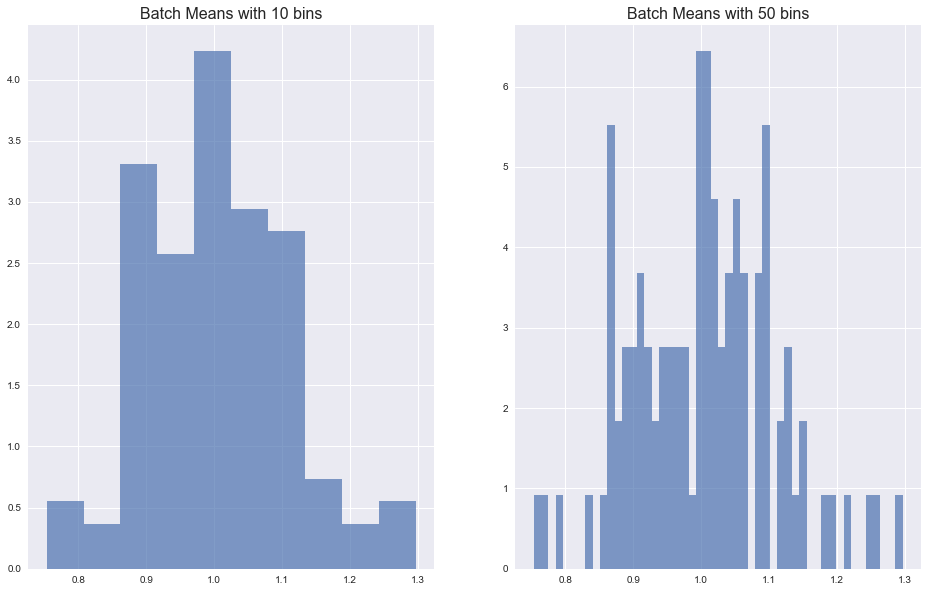

In [6]:
batch_means = batch_sampling(100,100)
mean_plots = plot_hists(batch_means,'Batch Means')

The Gaussian behavior is fairly clear in these graphics, but we can make it more apparent if we increase the number of batches. Let's try 100,000 batches instead, but each with still 100 histories. We can overlay the predicted Gaussian distribution (with mean $\mu = 1$ and variance $\frac{\sigma^2}{n} = 0.01$) given by the central limit theorem on the plots.

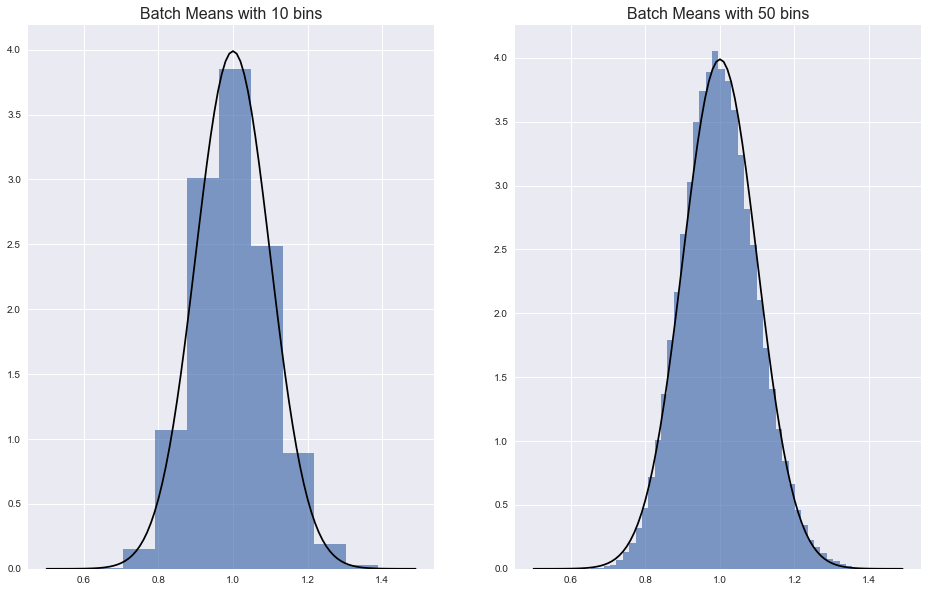

In [7]:
batch_means = batch_sampling(100_000,100)
mean_plots = plot_hists(batch_means,'Batch Means',overlay=True)